In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
from collections import defaultdict

In [36]:
"""
Read the gzip file, return the decompressed df 
:logfile: filename with gz suffix, i.e.'PeriodicPower.log.gz
Return df
"""
def read_log(logfile):
    with gzip.open(logfile, 'rb') as f:
        df = pd.read_csv(f, delim_whitespace=True)      
        return df

In [37]:
df = read_log('PeriodicPower.log.gz')
df.head()

,L3,C_0_IALU,C_0_FPU,C_0_FPIW,C_0_REN,C_0_ROB,C_0_MMU,C_0_SQ,C_0_BTB,C_0_DC,...,C_3_RBB,C_3_Other,C_3_L2,C_3_IRF,C_3_LQ,C_3_BP,C_3_IC,C_3_IB,C_3_ID,C_3_FPRF
0,0.236875,0.143956,0.002761,0.000903,0.001295,0.038348,0.00308,0.000651,0.000552,0.000186,...,0.092398,0.005795,0.001733,0.010447,0.026171,0.173112,0.031862,0.011428,0.026833,0.028803
1,0.236866,0.143956,0.002761,0.000903,0.001295,0.038348,0.00308,0.000651,0.000552,0.000186,...,0.092819,0.005833,0.001747,0.010540,0.026408,0.174514,0.032084,0.011538,0.026986,0.028790
2,0.236861,0.143956,0.002761,0.000903,0.001295,0.038348,0.00308,0.000651,0.000552,0.000186,...,0.093132,0.005858,0.001755,0.010632,0.026640,0.175935,0.032267,0.011629,0.027140,0.028811
3,0.236856,0.143956,0.002761,0.000903,0.001295,0.038348,0.00308,0.000651,0.000552,0.000186,...,0.093079,0.005853,0.001754,0.010632,0.026640,0.175933,0.032231,0.011611,0.027127,0.028824
4,0.236856,0.143956,0.002761,0.000903,0.001295,0.038348,0.00308,0.000651,0.000552,0.000186,...,0.093146,0.005857,0.001755,0.010665,0.026725,0.176434,0.032275,0.011633,0.027180,0.028789


In [38]:
"""
Process data according to cores, calculate sum, average, std, max, return as dict(dict), i.e. {0: {'sum': 103.49,'average': 0.46}}
:df: dataFrame object of file data
:cores: number of cores(threads)
:mode: [TODO]
:pc: precision of calculated results
Return df, df_results
"""
def process_data(df, cores, mode, pc):
    header_list = df.columns.values
    df_results = {}
    for i in range(cores):
        attr_list = [item for item in header_list if item[:3] == ('C_'+str(i))]     # attribute list of core i
        df['C_'+str(i)] = df[attr_list].sum(axis=1)   #TODO mode to replace
        fractions = {item: round(df[item].sum(),pc) for item in attr_list}
        df_results[i] = {'sum': round(df['C_'+str(i)].sum(), pc),'average': round(df['C_'+str(i)].mean(), pc),\
                         'std': round(df['C_'+str(i)].std(), pc), 'max':round(df['C_'+str(i)].max(), pc), \
                         'fraction':fractions}
        
    
    return df,df_results

In [39]:
df, df_results = process_data(df, 4, sum, 2)
df.head()
# can print df_results if needed (it's long, folded)

,L3,C_0_IALU,C_0_FPU,C_0_FPIW,C_0_REN,C_0_ROB,C_0_MMU,C_0_SQ,C_0_BTB,C_0_DC,...,C_3_LQ,C_3_BP,C_3_IC,C_3_IB,C_3_ID,C_3_FPRF,C_0,C_1,C_2,C_3
0,0.236875,0.143956,0.002761,0.000903,0.001295,0.038348,0.00308,0.000651,0.000552,0.000186,...,0.026171,0.173112,0.031862,0.011428,0.026833,0.028803,0.402758,1.061908,1.062284,1.062219
1,0.236866,0.143956,0.002761,0.000903,0.001295,0.038348,0.00308,0.000651,0.000552,0.000186,...,0.026408,0.174514,0.032084,0.011538,0.026986,0.028790,0.402758,1.068010,1.067999,1.067995
2,0.236861,0.143956,0.002761,0.000903,0.001295,0.038348,0.00308,0.000651,0.000552,0.000186,...,0.026640,0.175935,0.032267,0.011629,0.027140,0.028811,0.402758,1.073367,1.073503,1.073604
3,0.236856,0.143956,0.002761,0.000903,0.001295,0.038348,0.00308,0.000651,0.000552,0.000186,...,0.026640,0.175933,0.032231,0.011611,0.027127,0.028824,0.402758,1.072846,1.073041,1.073118
4,0.236856,0.143956,0.002761,0.000903,0.001295,0.038348,0.00308,0.000651,0.000552,0.000186,...,0.026725,0.176434,0.032275,0.011633,0.027180,0.028789,0.402758,1.074591,1.074944,1.074884


In [40]:
"""
Merge value less than threshold, if set the upper bound of merged item, obey these two rules
:res_dict: dict needs to be merged
:threshold: 0-1, it affects the minimal fraction in the pie chart
:upperbound: the max number of items to be merged(folded), can be set as 3-5 if needed
"""
def merge_by_threshold(res_dict, threshold, upperbound = 100):      # hard code as 100 [TODO]
    merged_fractions = {}
    merged_details = defaultdict(dict)

    fractions = res_dict
    sum_num = sum(res_dict.values())
    length = len(fractions)
    
    merge_count = 0 # count the number of merged item in one merge (at most 3)
    temp_dict = {}
    temp_value = 0  # temp value to sum the merged value
    merged_name = '' # concat the merged item name
    iter_count = 0 # count if is the last key:value pair
    j = 0 # count the number of all merged fractions   
    
    for key, value in fractions.items():
        iter_count +=1
        if value/sum_num >= threshold:
            merged_fractions[key] = value
        else: # merge 3 items at most
            if merge_count != upperbound and temp_value/sum_num < threshold:
                merged_name += key[4:] + '/'    # only adhere the suffix   
                temp_value += value
                temp_dict[key] = value
                merge_count += 1
            if merge_count == upperbound or iter_count == length or temp_value/sum_num >= threshold:
                merged_fractions[merged_name] = round(temp_value, 2)
                merged_details[merged_name] = temp_dict
                # reset the count values
                temp_value = 0
                merge_count = 0
                merged_name = ''
                temp_dict = {}
                j += 1
    return merged_fractions, merged_details

In [41]:
plot_frac, merged_frac = merge_by_threshold(df_results[0]['fraction'], 1/36)
plot_frac

{'C_0_IALU': 30.23,
 'C_0_ROB': 8.05,
 'C_0_CALU': 19.63,
 'C_0_RBB': 11.11,
 'FPU/FPIW/REN/MMU/SQ/BTB/DC/IW/Other/': 2.61,
 'C_0_BP': 3.57,
 'L2/IRF/LQ/IC/IB/ID/': 3.97,
 'C_0_FPRF': 5.44}

In [42]:
merged_frac

defaultdict(dict,
            {'FPU/FPIW/REN/MMU/SQ/BTB/DC/IW/Other/': {'C_0_FPU': 0.59,
              'C_0_FPIW': 0.19,
              'C_0_REN': 0.27,
              'C_0_MMU': 0.65,
              'C_0_SQ': 0.14,
              'C_0_BTB': 0.12,
              'C_0_DC': 0.04,
              'C_0_IW': 0.03,
              'C_0_Other': 0.58},
             'L2/IRF/LQ/IC/IB/ID/': {'C_0_L2': 0.12,
              'C_0_IRF': 0.07,
              'C_0_LQ': 0.1,
              'C_0_IC': 1.88,
              'C_0_IB': 0.01,
              'C_0_ID': 1.79}})

In [43]:
# https://stackoverflow.com/questions/46911687/how-to-set-border-for-wedges-in-matplotlib-pie-chart
# https://stackoverflow.com/questions/21572870/percent-label-position-in-pie-chart
def plot_pie(res_dict, title):
    y = res_dict.values()
    x = res_dict.keys()
    hatch_list = ['*O', 'oO','//*', 'O.', '|.','|*', '\\\\', '*.','o|', '////',   '*\\\\']
    plt.pie(y, labels = x, wedgeprops={"edgecolor":"black",'linewidth': 0.7, 'linestyle': 'solid', 'antialiased': True},  pctdistance=1.1, labeldistance=1.1, hatch = hatch_list)   #autopct='%1.1f%%',
    plt.title(title)
    plt.show()
    

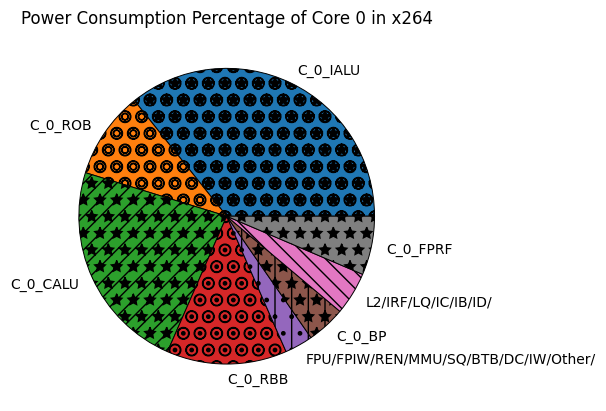

In [44]:
plot_pie(plot_frac, 'Power Consumption Percentage of Core 0 in x264')